## Import the Necessary Modules

In [1]:
from collections import Counter
from infomap import Infomap
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter


## Create a Directed graph 

In [2]:
# Read an edge list from the file 'connections.txt'
# The file should contain lines representing edges between nodes in the format: "source_node target_node"
# Assumes that nodes are of type int
G = nx.read_edgelist('connections.txt', create_using=nx.DiGraph(), nodetype=int)

## Show which nodes are bridges. 

### Bridge:

* in terms of node, those are the nodes with overlapping communities

* in terms of edges those are the ones with the highest edge betweenness

In [3]:
# Calculate betweenness centrality for nodes in the graph
betweenness = nx.betweenness_centrality(G)

# Set the 'betweenness' attribute for each node in the graph
nx.set_node_attributes(G, betweenness, 'betweenness')

# Sort nodes based on their betweenness centrality in descending order
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

# Select the top 3 nodes with highest betweenness centrality
top3b = [tup[0] for tup in sorted_betweenness][:3]

# Extract betweenness centrality values for the top 3 nodes
b = [betweenness[i] for i in top3b]

# Create a dictionary mapping top 3 nodes to their betweenness centrality values
top3_betweenness_dict = dict(zip(top3b, b))

# Display the top 3 nodes and their betweenness centrality values
count = 0
print('Nodes with Highest Betweenness Centrality:')
for i in top3_betweenness_dict:
    count += 1
    print(f'Top Node {count}: Node {i}, Betweenness: {top3_betweenness_dict[i]}')


Nodes with Highest Betweenness Centrality:
Top Node 1: Node 1684, Betweenness: 0.03299985344063623
Top Node 2: Node 1912, Betweenness: 0.027145672353148857
Top Node 3: Node 1718, Betweenness: 0.026577614223444346


## Show the density of the graph. Comment about your findings

In [4]:
# Calculate and Print Graph Density
density_value = nx.density(G)
print("The density: {}".format(density_value))

The density: 0.0054099817517196435


The density value of approximately 0.0054 indicates a relatively sparse graph. A low density implies that only a small fraction of possible connections between nodes are present in the network. This may suggest that the nodes in the graph are not extensively interconnected, potentially reflecting a decentralized or loosely connected network structure. 

## Show which nodes have the highest and lowest number of connections. 

In [5]:
# Extract Nodes from Edges and Count Connections

# Extract all nodes from the edges of the graph
nodes = [tup[0] for tup in G.edges()]
nodes = sorted(nodes)

# Initialize variables
lst = [nodes[0]]
connections_dict = {}
count = 0

# Iterate through the sorted list of nodes to count connections for each node
for i in range(0, len(nodes)):
    if nodes[i] in lst:
        count += 1
    else:
        if i == len(nodes) - 1 and (nodes[i] != nodes[i-1]):
            connections_dict.update({nodes[i]: 1})
        else:
            connections_dict.update({nodes[i-1]: count})
            lst.append(nodes[i])
            count = 0
            count += 1

# Find nodes with maximum and minimum connections
max_connections = {key: value for key, value in connections_dict.items() if value == max(connections_dict.values())}
min_connections = {key: value for key, value in connections_dict.items() if value == min(connections_dict.values())}

# Display nodes with the highest connections
for i in max_connections:
    print(f'Node with the highest connections: Node: {i}, Connections: {max_connections[i]}')

# Display nodes with the lowest connections
count = 0
for i in min_connections:
    count += 1
    print(f'Node {count} with the lowest connections: Node: {i}, Connections: {min_connections[i]}')


Node with the highest connections: Node: 107, Connections: 1043
Node 1 with the lowest connections: Node: 33, Connections: 1
Node 2 with the lowest connections: Node: 35, Connections: 1
Node 3 with the lowest connections: Node: 47, Connections: 1
Node 4 with the lowest connections: Node: 52, Connections: 1
Node 5 with the lowest connections: Node: 61, Connections: 1
Node 6 with the lowest connections: Node: 70, Connections: 1
Node 7 with the lowest connections: Node: 76, Connections: 1
Node 8 with the lowest connections: Node: 90, Connections: 1
Node 9 with the lowest connections: Node: 112, Connections: 1
Node 10 with the lowest connections: Node: 145, Connections: 1
Node 11 with the lowest connections: Node: 153, Connections: 1
Node 12 with the lowest connections: Node: 154, Connections: 1
Node 13 with the lowest connections: Node: 155, Connections: 1
Node 14 with the lowest connections: Node: 160, Connections: 1
Node 15 with the lowest connections: Node: 164, Connections: 1
Node 16 

## Show which nodes have the highest incoming and outgoing connections.

In [6]:
# Calculate Node In-Degrees and Out-Degrees

# Calculate in-degrees for each node in the graph
in_degrees = [[n, G.in_degree(n)] for n in G.nodes()]

# Calculate out-degrees for each node in the graph
out_degrees = [[n, G.out_degree(n)] for n in G.nodes()]

# Find nodes with the maximum in-degrees
max_in_degrees = [i for i in in_degrees if i[1] == max(in_degrees, key=lambda x: x[1])[1]]

# Find nodes with the maximum out-degrees
max_out_degrees = [i for i in out_degrees if i[1] == max(out_degrees, key=lambda x: x[1])[1]]


In [7]:
print(f"""The Node with Highest Incoming Connections: {max_in_degrees[0][0]},
      Number of Connections: {max_in_degrees[0][1]}""")

The Node with Highest Incoming Connections: 1888,
      Number of Connections: 251


In [8]:
print(f"""The Node with Highest Outgoing Connections: {max_out_degrees[0][0]},
      Number of Connections: {max_out_degrees[0][1]}""")

The Node with Highest Outgoing Connections: 107,
      Number of Connections: 1043


## Show which nodes have the highest closeness, betweenness, and eigenvector | Interpret your findings.

In [9]:
# Calculate Closeness Centrality for Nodes

# Calculate closeness centrality for each node in the graph
closeness_dict = nx.closeness_centrality(G)

# Set the 'closeness' attribute for each node in the graph
nx.set_node_attributes(G, closeness_dict, 'closeness')

# Sort nodes based on their closeness centrality in descending order
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

# Select the top node with the highest closeness centrality
nodes = [tup for tup in sorted_closeness[:1]]

print(f'Highest closeness centrality node: {nodes[0][0]}, Closeness centrality: {nodes[0][1]}')

Highest closeness centrality node: 2642, Closeness centrality: 0.11797503012816456


Closeness centrality measures how close a node is to all other nodes in the network. In this case, node 2642 has the highest closeness centrality, indicating that it is, on average, more closely connected to other nodes in the network. This could imply that node 2642 has a central position, facilitating efficient communication and influence within the network.

In [10]:
# Calculate Betweenness Centrality for Nodes

# Calculate betweenness centrality for each node in the graph
betweenness_dict = nx.betweenness_centrality(G)

# Set the 'betweenness' attribute for each node in the graph
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

# Sort nodes based on their betweenness centrality in descending order
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

# Select the top node with the highest betweenness centrality
nodes = [tup for tup in sorted_betweenness[:1]]

print(f'Highest betweenness centrality node: {nodes[0][0]}, Betweenness centrality: {nodes[0][1]}')


Highest betweenness centrality node: 1684, Betweenness centrality: 0.03299985344063623


Betweenness centrality identifies nodes that act as crucial bridges or intermediaries in the network. Node 1684, with the highest betweenness centrality, plays a significant role in connecting different parts of the network. It likely serves as a key mediator for information flow and influence, potentially controlling communication paths between other nodes.

In [11]:
# Calculate eigenvector centrality with increased max_iter
eigenvector = nx.centrality.eigenvector_centrality(G, max_iter=500)

# Find the node with the highest eigenvector centrality
highest_eigenvector_node = max(G.nodes, key=eigenvector.get)

# Get the eigenvector centrality value for the highest node
e = eigenvector[highest_eigenvector_node]

print(f'Highest eigenvector centrality node: {highest_eigenvector_node}, Eigenvector centrality: {e}')

Highest eigenvector centrality node: 2655, Eigenvector centrality: 0.802704299670652


Eigenvector centrality considers both the node's direct connections and the importance of its neighbors. Node 2655, with the highest eigenvector centrality, is likely influential and well-connected, not only directly but also through connections with other influential nodes. This node may act as a hub, potentially holding sway over other well-connected nodes in the network.

## Implement a community detection algorithm on the directed graph and show how many communities were created. 

In [12]:
def findCommunities(G):
    """
    Detect communities in a directed network using Infomap algorithm.

    Parameters:
    - G: NetworkX directed graph

    Returns:
    - num_top_modules: Number of top-level modules (communities) detected by Infomap
    - communities: Dictionary mapping node IDs to community IDs
    """
    im = Infomap("--two-level --directed")
    
    # Building Infomap network from a NetworkX graph
    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        im.addLink(*e)
    
    # Find communities with Infomap
    print("Find communities with Infomap...")
    im.run()
    
    # Print information about detected communities
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules, im.codelength))
    
    # Map nodes to their respective communities
    communities = {node.node_id: node.module_id for node in im.tree}
    
    # Set 'community' attribute for nodes in the NetworkX graph
    nx.set_node_attributes(G, communities, 'community')
    
    return im.num_top_modules, communities


In [13]:
# Find communities and their sizes
num_top_modules, communities = findCommunities(G)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
  Infomap v2.7.1 starts at 2023-12-15 02:12:54
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    directed
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'directed'... 
  -> Using unrecorded teleportation to links. 
  -> PageRank calculation done in 84 iterations.

  => Sum node flow: 1, sum link flow: 1
Build internal network with 4039 nodes and 88234 links...
  -> One-level codelength: 9.86597315

Trial 1/1 starting at 2023-12-15 02:12:54
Two-level compression: 33% 0.72% 0.0611712068% 0.0123350569% 
Partitioned to codelength 0.362732187 + 6.22468434 = 6.587416522 in 98 modules.

=> Trial 1/1 finished in 0.086642583s with codelength 6.58741652


Summary after 1 trial
Best end modular solution in 2 levels:
Per level number of modules:         [         98,           0] (sum: 98)
Pe

In [14]:
# Print the result to check the values
print("Number of Communities:", num_top_modules)

Number of Communities: 98


## Show the largest and the smallest community. | Interpret your findings

In [15]:
# Create a Counter from the community values in the 'communities' dictionary
counter = Counter(communities.values())

# Find the largest community and its size
largest_community = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:1]
print(f"The Largest Community: {largest_community}")

# Find the smallest community and its size
smallest_community = sorted(counter.items(), key=lambda x: x[1], reverse=False)[:1]
print(f"The Smallest Community: {smallest_community}")


The Largest Community: [(5, 432)]
The Smallest Community: [(38, 2)]


**The Largest Community**

- The largest community has a community ID of 5 and contains 432 nodes. 

- This suggests a well-connected and potentially cohesive group within the network.

- The nodes in this community likely share common interests, connections, or behaviors.

- Targeting this community in marketing or outreach efforts may yield widespread impact. 

- Understanding the community's characteristics can guide product/service customization or marketing campaigns tailored to their preferences. 

- Identifying influential nodes within this community can be crucial for strategic partnerships or collaborations.

**The Smallest Community**

- The smallest community has a community ID of 38 and contains 2 nodes.

- This indicates a smaller and potentially more isolated subgroup within the overall network structure. 

- The nodes in this community might have unique characteristics, potentially distinct from the larger network. 

- Specialized marketing strategies may be needed to engage with this smaller community effectively. 

- Understanding the specific needs or preferences of this subgroup can inform niche product/service offerings. 

- Investigating the nature of connections within this community may unveil valuable insights or opportunities.

-------------------------------------------------------------

The coexistence of both large and small communities indicates a diverse network structure.

Business strategies need to be adaptable, considering the different dynamics and characteristics of various communities.

A diverse range of community sizes contributes to network resilience, as disruptions in one area may not affect the entire network uniformly.

## - Select the largest three communities and draw them. 

 ## - Draw the influencers of those top 3 communities. 

In [16]:
# Find and print the top 3 largest communities and their sizes

# Sort communities in descending order of size and select the top 3
top3_largest_communities = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 largest communities and their sizes
print(top3_largest_communities)


[(5, 432), (3, 333), (2, 271)]


### Community 5

In [17]:
# Select nodes belonging to Community ID 5 and create a subgraph

# List of nodes in Community ID 5
selected_nodes = [n for n, d in G.nodes().items() if d['community'] == 5]

# Initialize an empty dictionary to store selected node data
selected_data = {}

# Iterate through selected nodes and gather required data
for node in selected_nodes:
    # Check if the node exists in the graph and has the 'community' attribute
    if node in G and 'community' in G.nodes[node]:
        selected_data[node] = {
            'community': G.nodes[node]['community'],
            # Add other data if needed
        }

# Create a subgraph using the selected nodes and their data
sg = G.subgraph(list(selected_data.keys()))

# Define layout using the spring layout algorithm
pos = nx.spring_layout(sg, seed=5656)


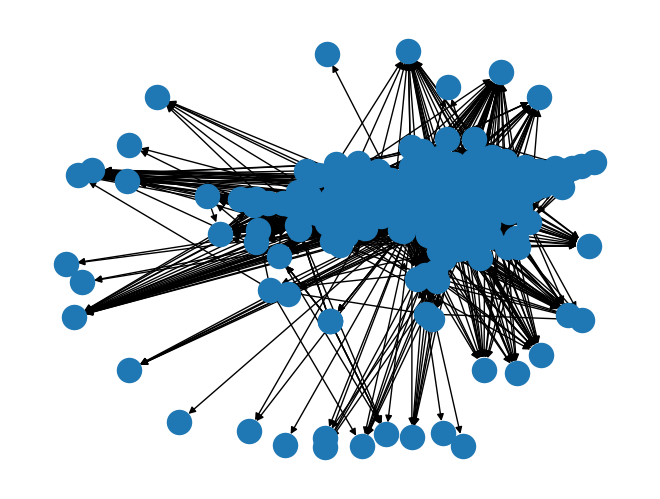

In [18]:
# Draw the subgraph using NetworkX and display the plot

# Draw the subgraph 'sg' using the specified layout 'pos'
nx.draw(sg, pos=pos)

# Display the plot using matplotlib
plt.show()


### Community 3

In [19]:
# Select nodes belonging to Community ID 3 and create a subgraph

# List of nodes in Community ID 3
selected_nodes = [n for n, d in G.nodes().items() if d['community'] == 3]

# Initialize an empty dictionary to store selected node data
selected_data = {}

# Iterate through selected nodes and gather required data
for node in selected_nodes:
    # Check if the node exists in the graph and has the 'community' attribute
    if node in G and 'community' in G.nodes[node]:
        selected_data[node] = {
            'community': G.nodes[node]['community'],
            # Add other data if needed
        }

# Create a subgraph using the selected nodes and their data
sg2 = G.subgraph(list(selected_data.keys()))

# Define layout using the spring layout algorithm
pos2 = nx.spring_layout(sg2, seed=5656)


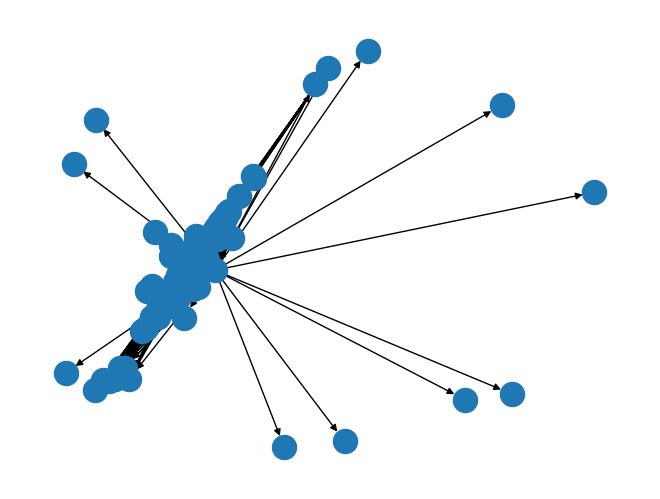

In [20]:
# Draw the second subgraph using NetworkX and display the plot

# Draw the subgraph 'sg2' using the specified layout 'pos2'
nx.draw(sg2, pos=pos2)

# Display the plot using matplotlib
plt.show()


### Community 2

In [21]:
# Select nodes belonging to Community ID 2 and create a subgraph

# List of nodes in Community ID 2
selected_nodes = [n for n, d in G.nodes().items() if d['community'] == 2]

# Initialize an empty dictionary to store selected node data
selected_data = {}

# Iterate through selected nodes and gather required data
for node in selected_nodes:
    # Check if the node exists in the graph and has the 'community' attribute
    if node in G and 'community' in G.nodes[node]:
        selected_data[node] = {
            'community': G.nodes[node]['community'],
            # Add other data if needed
        }

# Create a subgraph using the selected nodes and their data
sg3 = G.subgraph(list(selected_data.keys()))

# Define layout using the spring layout algorithm
pos3 = nx.spring_layout(sg3, seed=5656)


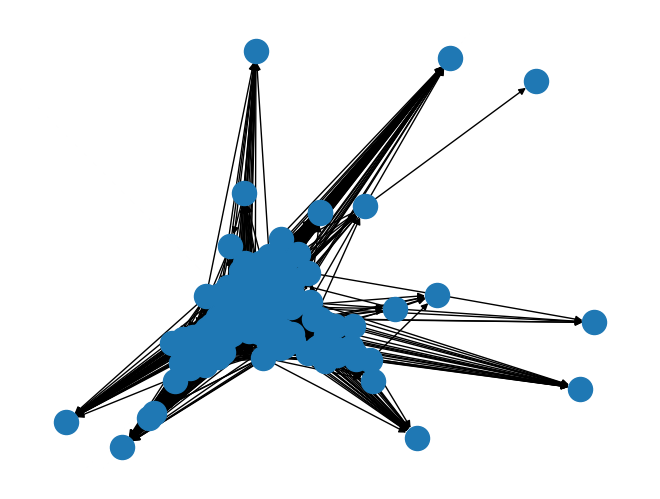

In [22]:
# Draw the third subgraph using NetworkX and display the plot

# Draw the subgraph 'sg3' using the specified layout 'pos3'
nx.draw(sg3, pos=pos3)

# Display the plot using matplotlib
plt.show()


### After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

### Community 5

In [23]:
# Calculate closeness centrality for nodes in the subgraph 'sg' and identify the top 3 nodes

# Calculate closeness centrality
closeness_dict = nx.closeness_centrality(sg)

# Set closeness centrality as a node attribute
nx.set_node_attributes(sg, closeness_dict, 'closeness')

# Sort nodes by closeness centrality in descending order
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

# Select the top 3 nodes with the highest closeness centrality
top3c = [tup[0] for tup in sorted_closeness][:3]


In [24]:
# Calculate betweenness centrality for nodes in the subgraph 'sg' and identify the top 3 nodes

# Calculate betweenness centrality
betweenness_dict = nx.betweenness_centrality(sg)

# Set betweenness centrality as a node attribute
nx.set_node_attributes(sg, betweenness_dict, 'betweenness')

# Sort nodes by betweenness centrality in descending order
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

# Select the top 3 nodes with the highest betweenness centrality
top3b = [tup[0] for tup in sorted_betweenness][:3]


In [25]:
# Calculate degree centrality for nodes in the subgraph 'sg' and identify the top 3 nodes

# Calculate degree centrality
degree_dict = nx.degree_centrality(sg)

# Set degree centrality as a node attribute
nx.set_node_attributes(sg, degree_dict, 'degree')

# Sort nodes by degree centrality in descending order
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

# Select the top 3 nodes with the highest degree centrality
top3d = [tup[0] for tup in sorted_degree][:3]


In [26]:
# Calculate eigenvector centrality for nodes in the subgraph 'sg' and identify the top 3 nodes

# Calculate eigenvector centrality
eigen_dict = nx.eigenvector_centrality(sg, max_iter=600, tol=1e-6)

# Set eigenvector centrality as a node attribute
nx.set_node_attributes(sg, eigen_dict, 'eigenvector')

# Sort nodes by eigenvector centrality in descending order
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1), reverse=True)

# Select the top 3 nodes with the highest eigenvector centrality
top3e = [tup[0] for tup in sorted_eigen][:3]


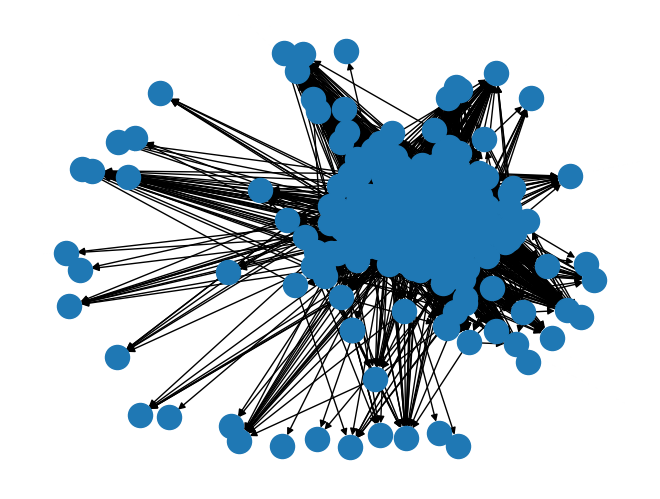

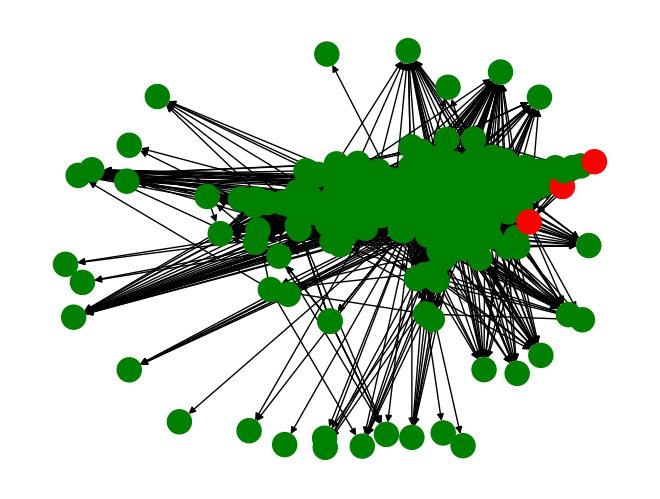

In [27]:
# Create a subgraph without the top 3 nodes based on closeness centrality ('top3c')

# Subgraph without the top 3 nodes
sg_without_influencers_c = sg.subgraph([node for node in sg.nodes() if node not in top3c])

# Define layout using the spring layout algorithm
pos_without_influencers_c = nx.spring_layout(sg_without_influencers_c, seed=5656)

# Draw the subgraph without influencers, hide labels, and display the plot
nx.draw(sg_without_influencers_c, with_labels=False, pos=pos_without_influencers_c)
plt.show()

# Define node color based on top 3 nodes for comparison
color_map_c = ['red' if node in top3c else 'green' for node in sg]

# Draw the original subgraph with node color mapping and display the plot
nx.draw(sg, pos=pos, node_color=color_map_c)
plt.show()


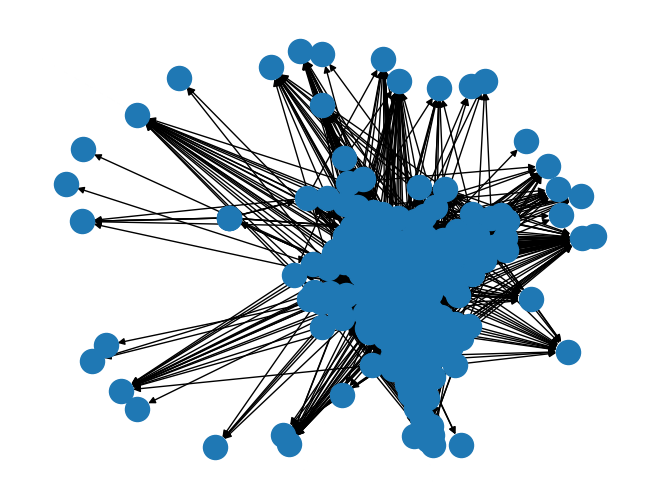

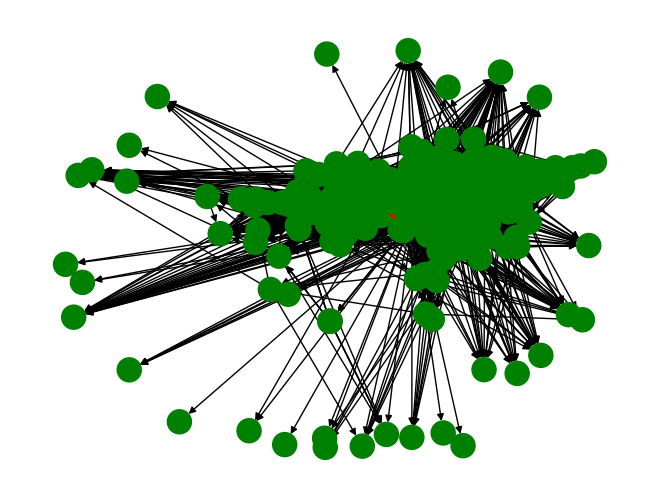

In [28]:
# Create a subgraph without the top 3 nodes based on betweenness centrality ('top3b')

# Subgraph without the top 3 nodes
sg_without_influencers_b = sg.subgraph([node for node in sg.nodes() if node not in top3b])

# Define layout using the spring layout algorithm
pos_without_influencers_b = nx.spring_layout(sg_without_influencers_b, seed=5656)

# Draw the subgraph without influencers, hide labels, and display the plot
nx.draw(sg_without_influencers_b, with_labels=False, pos=pos_without_influencers_b)
plt.show()

# Define node color based on top 3 nodes for comparison
color_map_b = ['red' if node in top3b else 'green' for node in sg]

# Draw the original subgraph with node color mapping and display the plot
nx.draw(sg, pos=pos, node_color=color_map_b)
plt.show()



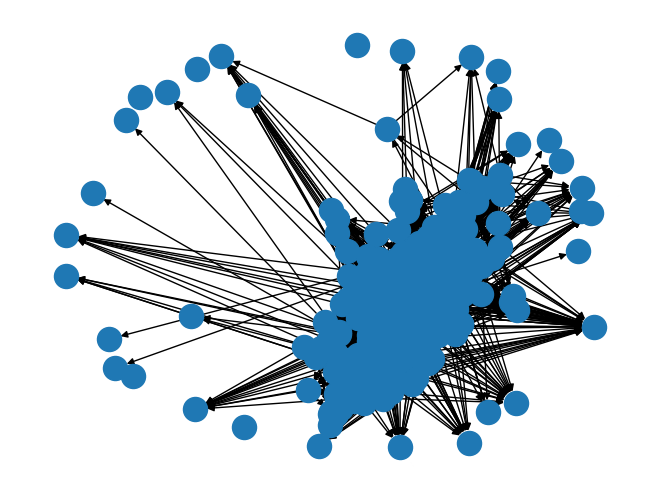

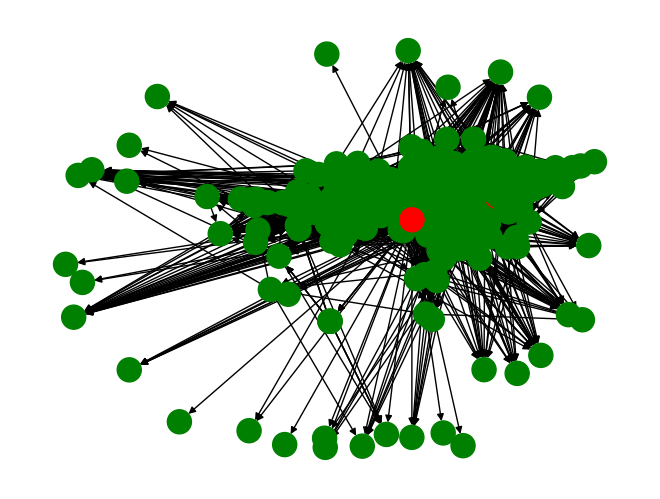

In [29]:
# Create a subgraph without the top 3 nodes based on degree centrality ('top3d')

# Subgraph without the top 3 nodes
sg_without_influencers_d = sg.subgraph([node for node in sg.nodes() if node not in top3d])

# Define layout using the spring layout algorithm
pos_without_influencers_d = nx.spring_layout(sg_without_influencers_d, seed=5656)

# Draw the subgraph without influencers, hide labels, and display the plot
nx.draw(sg_without_influencers_d, with_labels=False, pos=pos_without_influencers_d)
plt.show()

# Define node color based on top 3 nodes for comparison
color_map_d = ['red' if node in top3d else 'green' for node in sg]

# Draw the original subgraph with node color mapping and display the plot
nx.draw(sg, pos=pos, node_color=color_map_d)
plt.show()


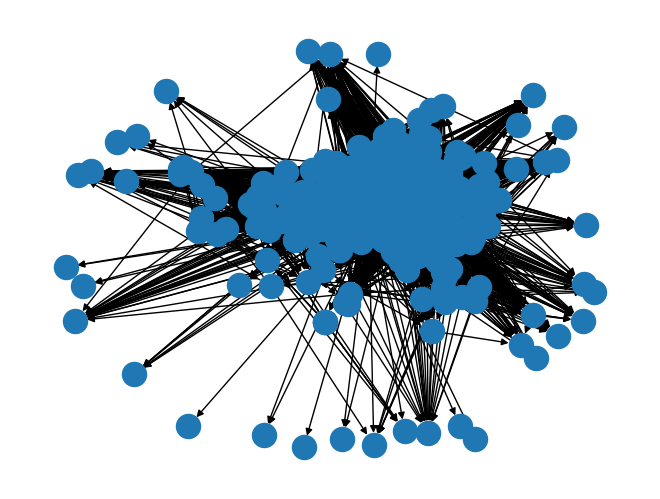

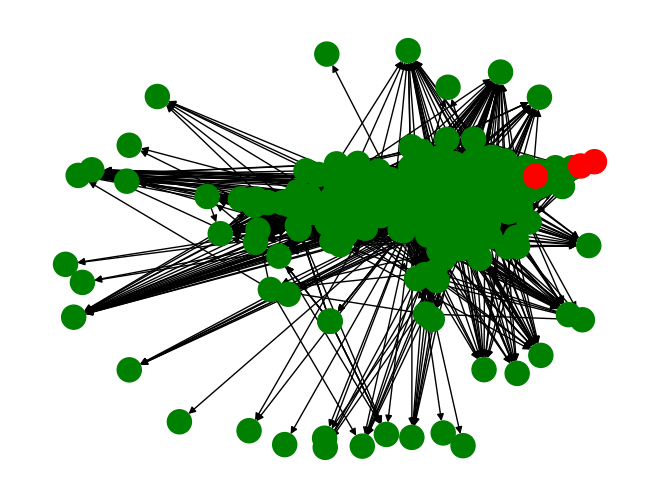

In [30]:

# Create a subgraph without the top 3 nodes based on eigenvector centrality ('top3e')

# Subgraph without the top 3 nodes
sg_without_influencers_e = sg.subgraph([node for node in sg.nodes() if node not in top3e])

# Define layout using the spring layout algorithm
pos_without_influencers_e = nx.spring_layout(sg_without_influencers_e, seed=5656)

# Draw the subgraph without influencers, hide labels, and display the plot
nx.draw(sg_without_influencers_e, with_labels=False, pos=pos_without_influencers_e)
plt.show()

# Define node color based on top 3 nodes for comparison
color_map_e = ['red' if node in top3e else 'green' for node in sg]

# Draw the original subgraph with node color mapping and display the plot
nx.draw(sg, pos=pos, node_color=color_map_e)
plt.show()



### Community 3

In [31]:
# Calculate closeness centrality for nodes in sg2

# Closeness centrality dictionary
closeness_dict = nx.closeness_centrality(sg2)

# Set closeness centrality as node attributes in sg2
nx.set_node_attributes(sg2, closeness_dict, 'closeness')

# Sort nodes by closeness centrality in descending order
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

# Extract the top 3 nodes based on closeness centrality
top3c_2 = [tup[0] for tup in sorted_closeness][:3]


In [32]:
# Calculate betweenness centrality for nodes in sg2

# Betweenness centrality dictionary
betweenness_dict = nx.betweenness_centrality(sg2)

# Set betweenness centrality as node attributes in sg2
nx.set_node_attributes(sg2, betweenness_dict, 'betweenness')

# Sort nodes by betweenness centrality in descending order
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

# Extract the top 3 nodes based on betweenness centrality
top3b_2 = [tup[0] for tup in sorted_betweenness][:3]



In [33]:
# Calculate degree centrality for nodes in sg2

# Degree centrality dictionary
degree_dict = nx.degree_centrality(sg2)

# Set degree centrality as node attributes in sg2
nx.set_node_attributes(sg2, degree_dict, 'degree')

# Sort nodes by degree centrality in descending order
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

# Extract the top 3 nodes based on degree centrality
top3d_2 = [tup[0] for tup in sorted_degree][:3]



In [34]:
# Calculate eigenvector centrality for nodes in sg2

# Eigenvector centrality dictionary
eigen_dict = nx.eigenvector_centrality(sg2, max_iter=900, tol=1e-6)

# Set eigenvector centrality as node attributes in sg2
nx.set_node_attributes(sg2, eigen_dict, 'eigenvector')

# Sort nodes by eigenvector centrality in descending order
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1), reverse=True)

# Extract the top 3 nodes based on eigenvector centrality
top3e_2 = [tup[0] for tup in sorted_eigen][:3]


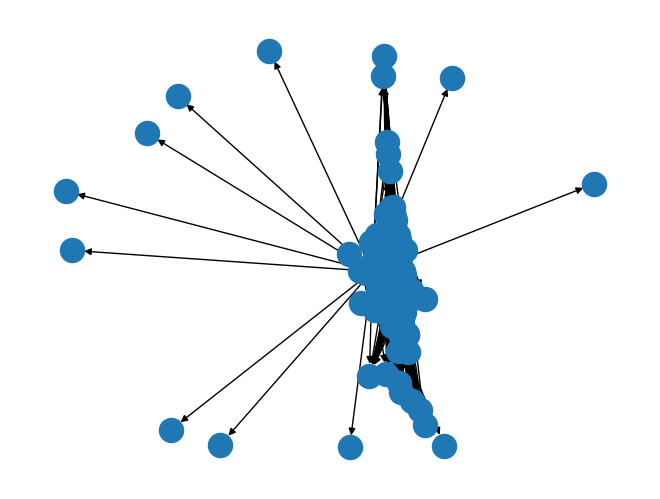

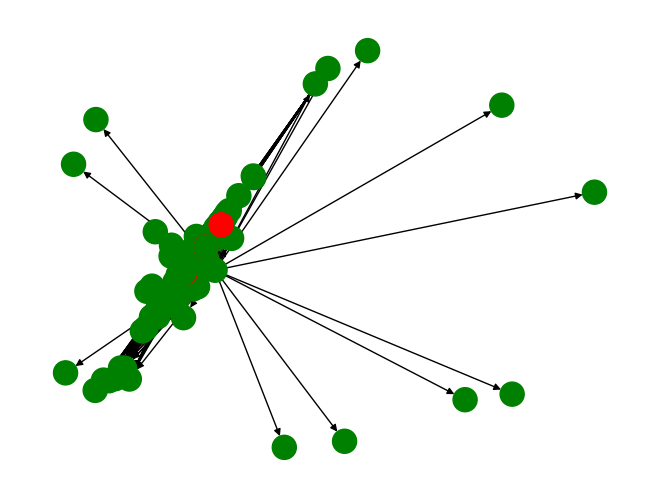

In [35]:
# Remove top3c nodes from sg2
sg2_without_influencers_c = sg2.subgraph([node for node in sg2.nodes() if node not in top3c_2])

# Generate layout for visualization
pos2_without_influencers_c = nx.spring_layout(sg2_without_influencers_c, seed=5656)

# Draw the subgraph without top3c nodes
nx.draw(sg2_without_influencers_c, with_labels=False, pos=pos2_without_influencers_c)
plt.show()

# Color map for sg2 nodes, distinguishing top3c nodes
color_map_c = ['red' if node in top3c_2 else 'green' for node in sg2]
nx.draw(sg2, pos=pos2, node_color=color_map_c)
plt.show()


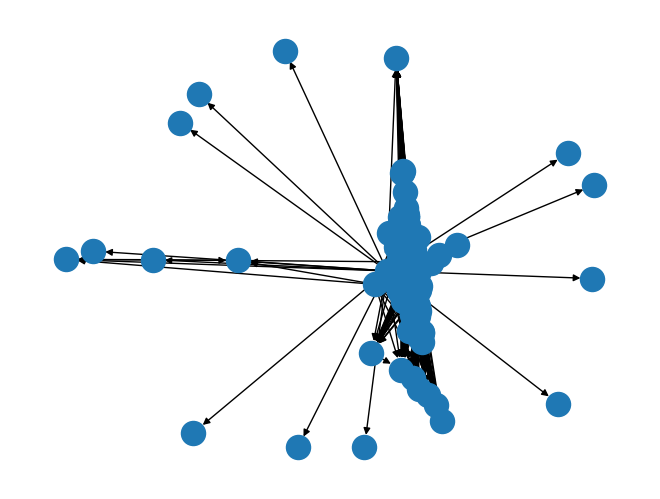

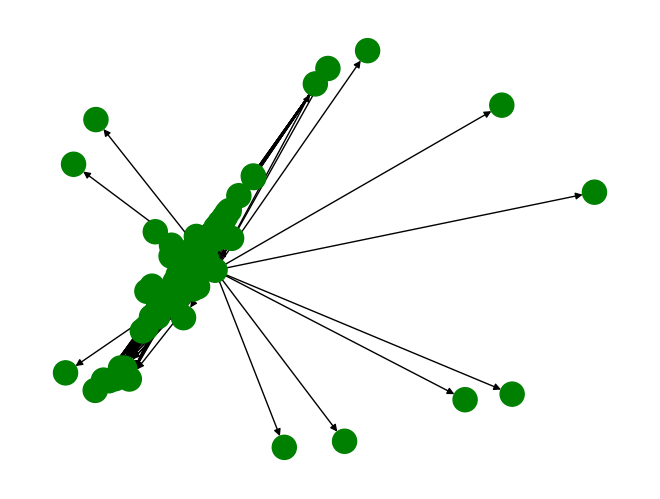

In [36]:
# Remove top3b nodes from sg2
sg2_without_influencers_b = sg2.subgraph([node for node in sg2.nodes() if node not in top3b_2])

# Generate layout for visualization
pos2_without_influencers_b = nx.spring_layout(sg2_without_influencers_b, seed=5656)

# Draw the subgraph without top3b nodes
nx.draw(sg2_without_influencers_b, with_labels=False, pos=pos2_without_influencers_b)
plt.show()

# Color map for sg2 nodes, distinguishing top3b nodes
color_map_b = ['red' if node in top3b_2 else 'green' for node in sg2]
nx.draw(sg2, pos=pos2, node_color=color_map_b)
plt.show()


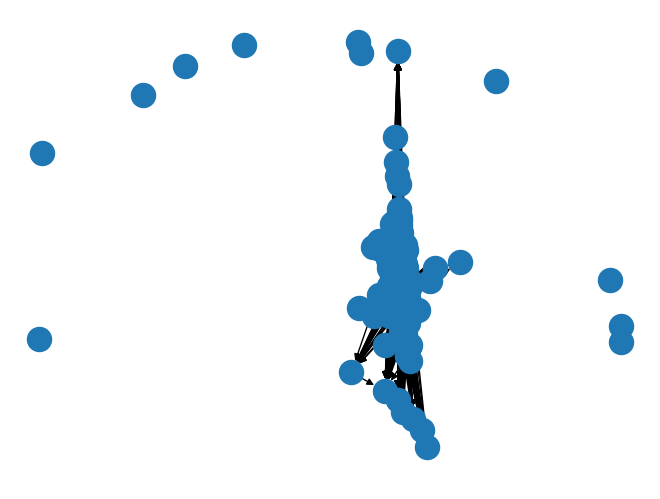

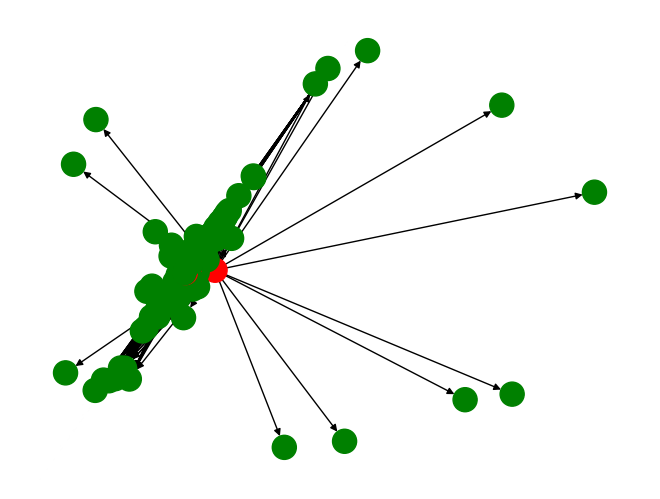

In [37]:
# Remove top3d nodes from sg2
sg2_without_influencers_d = sg2.subgraph([node for node in sg2.nodes() if node not in top3d_2])

# Generate layout for visualization
pos2_without_influencers_d = nx.spring_layout(sg2_without_influencers_d, seed=5656)

# Draw the subgraph without top3d nodes
nx.draw(sg2_without_influencers_d, with_labels=False, pos=pos2_without_influencers_d)
plt.show()

# Color map for sg2 nodes, distinguishing top3d nodes
color_map_d = ['red' if node in top3d_2 else 'green' for node in sg2]
nx.draw(sg2, pos=pos2, node_color=color_map_d)
plt.show()


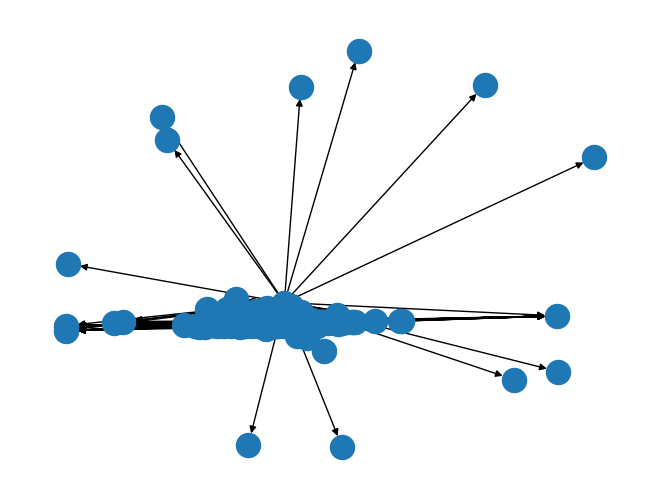

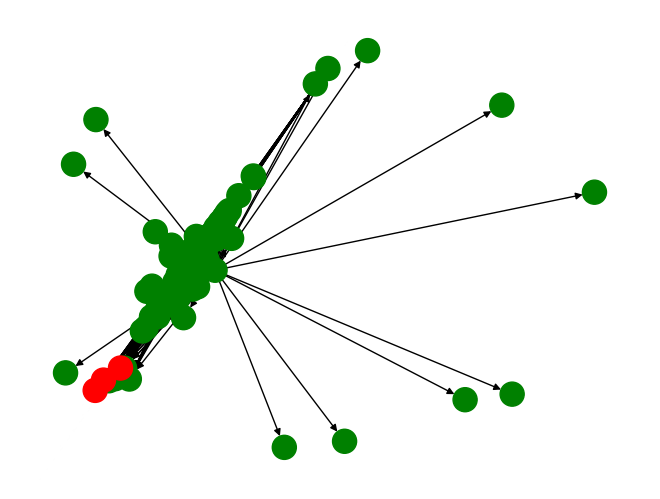

In [38]:
# Remove top3e nodes from sg2
sg2_without_influencers_e = sg2.subgraph([node for node in sg2.nodes() if node not in top3e_2])

# Generate layout for visualization
pos2_without_influencers_e = nx.spring_layout(sg2_without_influencers_e, seed=5656)

# Draw the subgraph without top3e nodes
nx.draw(sg2_without_influencers_e, with_labels=False, pos=pos2_without_influencers_e)
plt.show()

# Color map for sg2 nodes, distinguishing top3e nodes
color_map_e = ['red' if node in top3e_2 else 'green' for node in sg2]
nx.draw(sg2, pos=pos2, node_color=color_map_e)
plt.show()


### Community 2

In [39]:
# Calculate closeness centrality for sg3
closeness_dict = nx.closeness_centrality(sg3)

# Set closeness centrality as node attribute in sg3
nx.set_node_attributes(sg3, closeness_dict, 'closeness')

# Sort nodes based on closeness centrality
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

# Extract top3c_3 nodes with the highest closeness centrality
top3c_3 = [tup[0] for tup in sorted_closeness][:3]


In [40]:
# Calculate betweenness centrality for sg3
betweenness_dict = nx.betweenness_centrality(sg3)

# Set betweenness centrality as node attribute in sg3
nx.set_node_attributes(sg3, betweenness_dict, 'betweenness')

# Sort nodes based on betweenness centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

# Extract top3b_3 nodes with the highest betweenness centrality
top3b_3 = [tup[0] for tup in sorted_betweenness][:3]



In [41]:
# Calculate degree centrality for sg3
degree_dict = nx.degree_centrality(sg3)

# Set degree centrality as node attribute in sg3
nx.set_node_attributes(sg3, degree_dict, 'degree')

# Sort nodes based on degree centrality
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

# Extract top3d_3 nodes with the highest degree centrality
top3d_3 = [tup[0] for tup in sorted_degree][:3]


In [42]:
# Calculate eigenvector centrality for sg3
eigen_dict = nx.eigenvector_centrality(sg3, max_iter=900, tol=1e-6)

# Set eigenvector centrality as node attribute in sg3
nx.set_node_attributes(sg3, eigen_dict, 'eigenvector')

# Sort nodes based on eigenvector centrality
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1), reverse=True)

# Extract top3e_3 nodes with the highest eigenvector centrality
top3e_3 = [tup[0] for tup in sorted_eigen][:3]


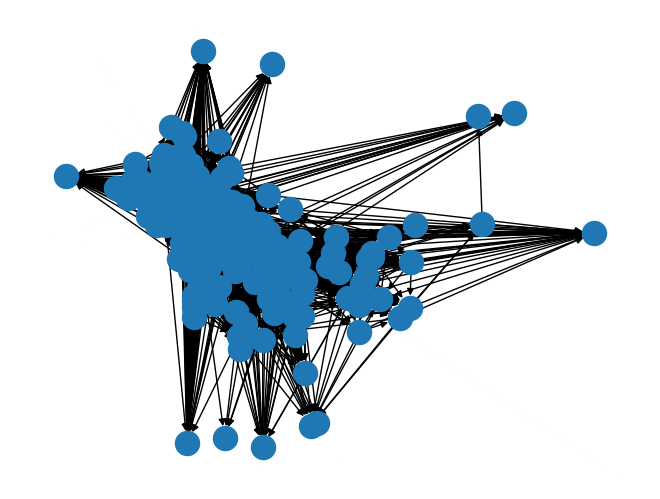

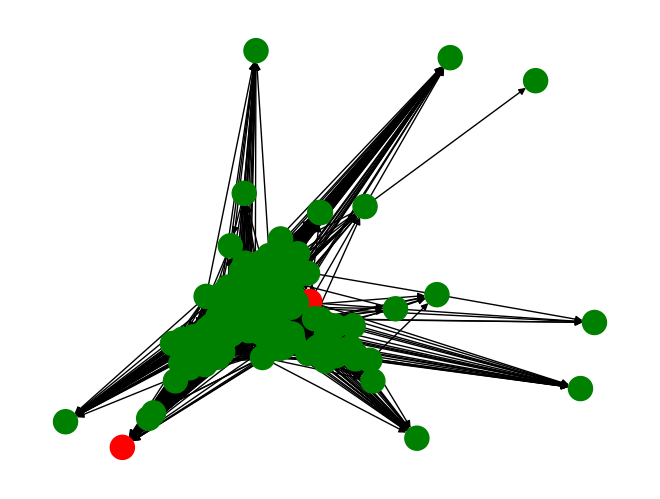

In [43]:
# Remove top3c nodes from sg3
sg3_without_influencers_c = sg3.subgraph([node for node in sg3.nodes() if node not in top3c_3])

# Calculate layout for the modified sg3 without top3c nodes
pos3_without_influencers_c = nx.spring_layout(sg3_without_influencers_c, seed=5656)

# Draw the modified sg3 without top3c nodes
nx.draw(sg3_without_influencers_c, with_labels=False, pos=pos3_without_influencers_c)
plt.show()

# Define node colors for sg3 with different colors for top3c nodes
color_map_c = ['red' if node in top3c_3 else 'green' for node in sg3]

# Draw sg3 with node colors
nx.draw(sg3, pos=pos3, node_color=color_map_c)
plt.show()



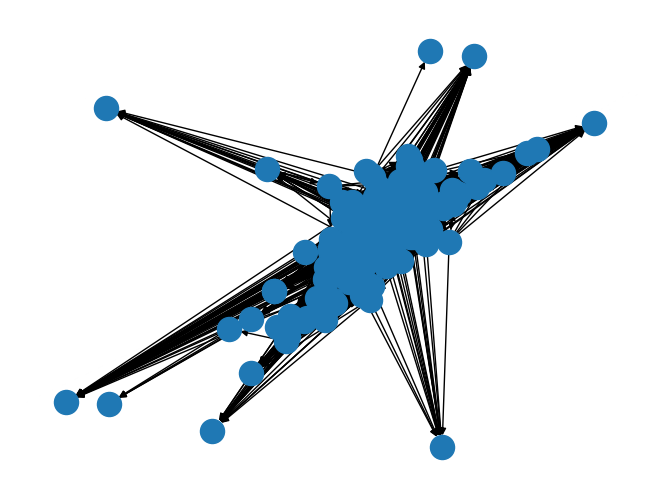

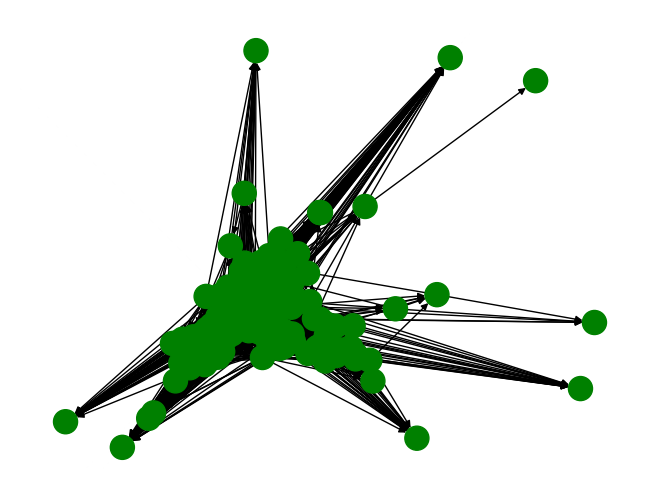

In [44]:
# Remove top3b nodes from sg3
sg3_without_influencers_b = sg3.subgraph([node for node in sg3.nodes() if node not in top3b_3])

# Calculate layout for the modified sg3 without top3b nodes
pos3_without_influencers_b = nx.spring_layout(sg3_without_influencers_b, seed=5656)

# Draw the modified sg3 without top3b nodes
nx.draw(sg3_without_influencers_b, with_labels=False, pos=pos3_without_influencers_b)
plt.show()

# Define node colors for sg3 with different colors for top3b nodes
color_map_b = ['red' if node in top3b_3 else 'green' for node in sg3]

# Draw sg3 with node colors
nx.draw(sg3, pos=pos3, node_color=color_map_b)
plt.show()



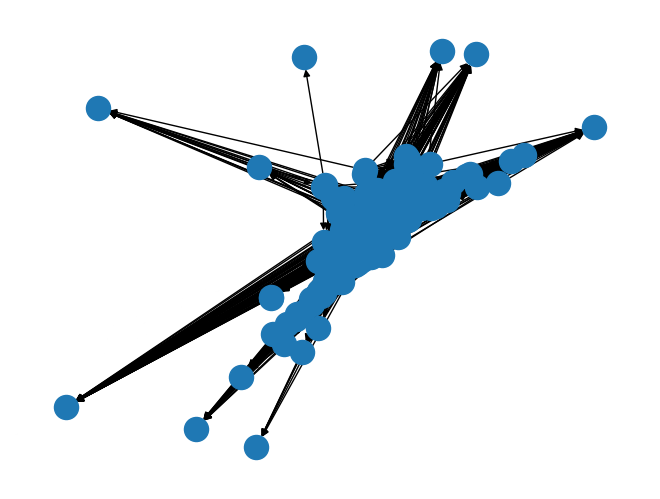

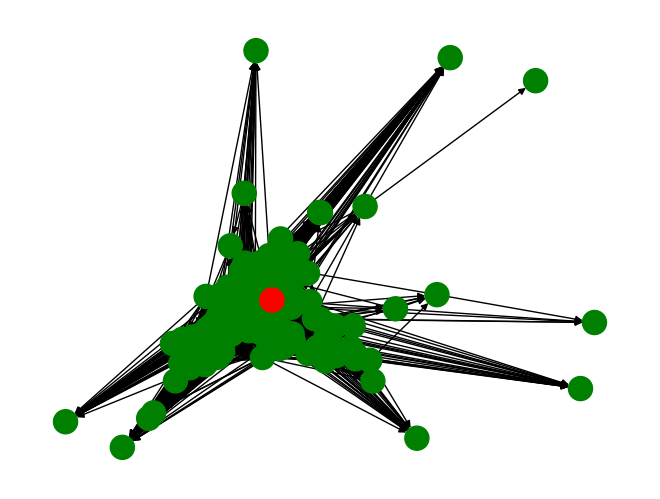

In [45]:
# Remove top3d nodes from sg3
sg3_without_influencers_d = sg3.subgraph([node for node in sg3.nodes() if node not in top3d_3])

# Calculate layout for the modified sg3 without top3d nodes
pos3_without_influencers_d = nx.spring_layout(sg3_without_influencers_d, seed=5656)

# Draw the modified sg3 without top3d nodes
nx.draw(sg3_without_influencers_d, with_labels=False, pos=pos3_without_influencers_d)
plt.show()

# Define node colors for sg3 with different colors for top3d nodes
color_map_d = ['red' if node in top3d_3 else 'green' for node in sg3]

# Draw sg3 with node colors
nx.draw(sg3, pos=pos3, node_color=color_map_d)
plt.show()


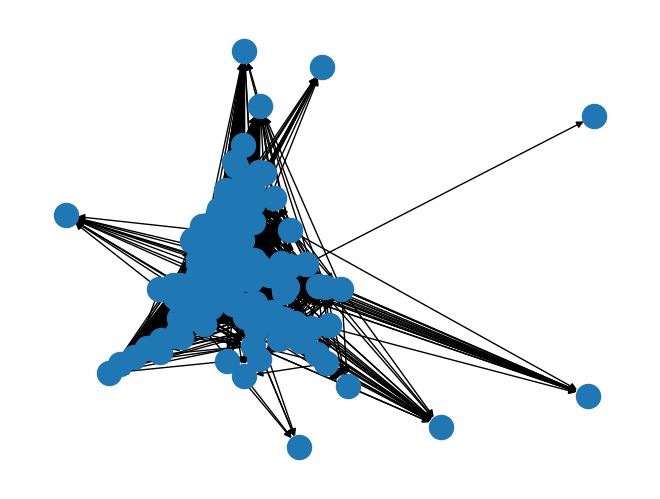

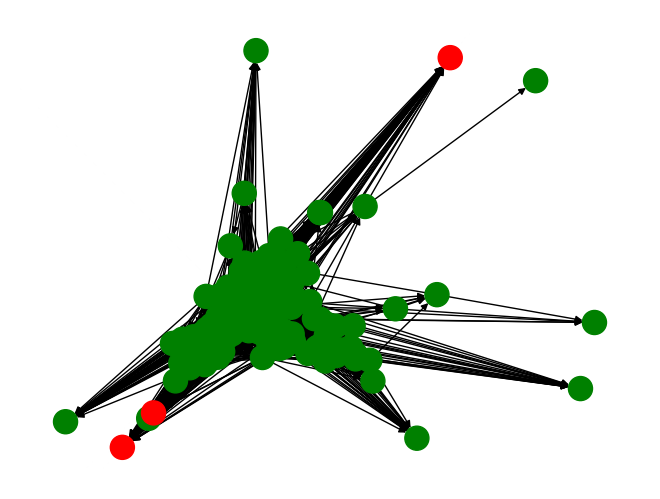

In [46]:
# Remove top3e nodes from sg3
sg3_without_influencers_e = sg3.subgraph([node for node in sg3.nodes() if node not in top3e_3])

# Calculate layout for the modified sg3 without top3e nodes
pos3_without_influencers_e = nx.spring_layout(sg3_without_influencers_e, seed=5656)

# Draw the modified sg3 without top3e nodes
nx.draw(sg3_without_influencers_e, with_labels=False, pos=pos3_without_influencers_e)
plt.show()

# Define node colors for sg3 with different colors for top3e nodes
color_map_e = ['red' if node in top3e_3 else 'green' for node in sg3]

# Draw sg3 with node colors
nx.draw(sg3, pos=pos3, node_color=color_map_e)
plt.show()


## Design an action plan:

**a.** Use hypothetical business (telecom, marketing agency, etc.)

**b.** Use a hypothetical marketing budget

**c.** Use a hypothetical cost per action (advertisement cost)

**d.** Decide whom should you target? 

## Action Plan for Telecom Business Marketing Campaign Optimization

**a. Business Overview:**

- Business Type: Telecom Company

- Objective: Increase brand awareness and customer acquisition.

- Key Metric: Community size, influencer engagement, return on investment (ROI).

**b. Marketing Budget:**

- Hypothetical Marketing Budget: $100,000

- Allocation: Flexible allocation based on community sizes and influencer negotiations.

**c. Cost Per Action (CPA):**

- Hypothetical CPA: $2 per action (click, sign-up, etc.)

- Consideration: Influencer prices and community sizes will influence the overall CPA.

**d. Target Audience and Strategy:**

- Target Audience: Communities with a high potential for customer acquisition.

- Strategy: Identify and engage with the largest communities in the social network.

### Action Steps:

**Community Detection:**

- Utilize Social Network Analysis (SNA) to identify and analyze communities within the network.

- Calculate community sizes to prioritize targeting.

**Influencer Identification:**

- Identify influencers within each large community by analyzing node centrality, e.g., eigenvector centrality.

**Contact and Negotiation:**

- Reach out to the identified influencers with a personalized approach.

- Negotiate advertisement prices with influencers, considering the budget constraints.

- Request influencer insights on the community's preferences for effective ad creation.

**Budget Optimization:**

- Collect price quotes from multiple influencers within each community.

- Evaluate the cost-effectiveness of each influencer based on their price and potential impact.

- Optimize the budget allocation to maximize reach and engagement.

**Content Creation and Collaboration:**

- Collaborate with selected influencers to create compelling and tailored ad content.

- Ensure that the content aligns with the preferences and interests of the targeted communities.

**Campaign Launch:**

- Implement the marketing campaign simultaneously across chosen communities.

- Monitor real-time performance metrics, such as clicks, conversions, and community engagement.

**Performance Analysis and Iteration:**

- Analyze the performance of each influencer's campaign against the set KPIs.

- Iterate and optimize the campaign based on real-time data.

- Allocate additional budget to well-performing influencers or communities.

**ROI Assessment:**

- Regularly assess the overall ROI of the marketing campaign.

- Calculate the cost per acquisition and compare it with the initial CPA benchmark.

- Adjust the strategy based on the ongoing campaign performance.

### Outcome:

By targeting large communities through influencers, the telecom business aims to maximize its reach and impact while staying within the allocated budget. The iterative approach allows for continuous optimization, ensuring a cost-effective and successful marketing campaign.